In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import KFold
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# C - Ensemble Learning

## Load Dataset

In [2]:
df = pd.read_csv('statlog.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [3]:
df.shape

(270, 14)

## Split Train/Test

In [4]:
y = df[['presence']]

In [5]:
del df['presence']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0


In [6]:
X = df
X.shape

(270, 13)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.2)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

216 216
54 54


## Random Forest

In [14]:
n_tree = [10, 20, 50, 100, 200, 500, 1000]

val_acc = []
train_acc = []
val_var = []
train_var = []

for n in n_tree:
    # cross-validation
    cv = KFold(n_splits=10)
    # create model
    rf_model = RandomForestClassifier(n_estimators = n)
    results = cross_validate(estimator=rf_model, X=X_train, y=y_train, cv=cv, scoring='accuracy', return_train_score=True)
    val_acc.append(results['test_score'].mean())
    train_acc.append(results['train_score'].mean())
    val_var.append(np.var(results['test_score']))
    train_var.append(np.var(results['train_score']))

print('Train Accuracy:', train_acc)
print('Validation Accuracy:', val_acc)
print('Train Variance:', train_var)
print('Validation Variance:', val_var)

Train Accuracy: [0.9866323024054984, 0.9963996827914354, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Accuracy: [0.8108225108225108, 0.806060606060606, 0.8383116883116882, 0.8430735930735931, 0.8335497835497835, 0.8339826839826839, 0.8339826839826839]
Train Variance: [0.00011191993146014274, 1.0869445365059145e-05, 0.0, 0.0, 0.0, 0.0, 0.0]
Validation Variance: [0.00578062630010682, 0.006117951312756507, 0.007715419501133787, 0.006738301381158526, 0.007659573471261785, 0.007934680759356086, 0.007934680759356086]


### Plot the results

Text(0.5, 1.0, 'Training Accuracy - #tree')

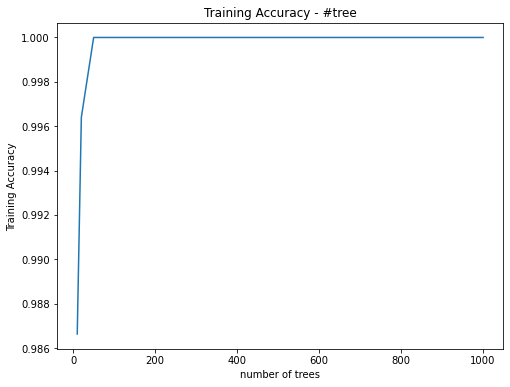

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(n_tree, train_acc)
plt.xlabel('number of trees')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy - #tree')

Text(0.5, 1.0, 'Validation Accuracy - #tree')

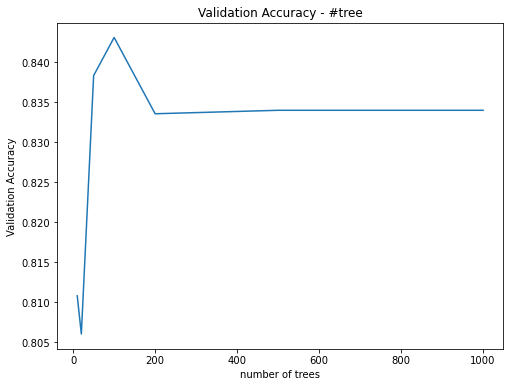

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(n_tree, val_acc)
plt.xlabel('number of trees')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy - #tree')

Text(0.5, 1.0, 'Training Variance - #tree')

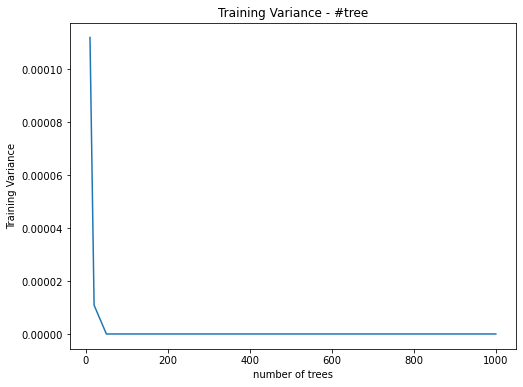

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(n_tree, train_var)
plt.xlabel('number of trees')
plt.ylabel('Training Variance')
plt.title('Training Variance - #tree')

Text(0.5, 1.0, 'Validation Variance - #tree')

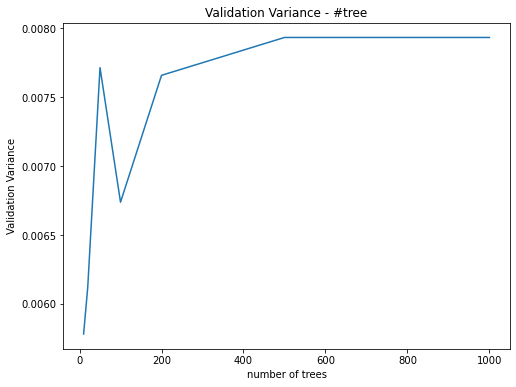

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(n_tree, val_var)
plt.xlabel('number of trees')
plt.ylabel('Validation Variance')
plt.title('Validation Variance - #tree')

#### Best number of trees is 100

In [19]:
n_trees_best = 100

### Train the model

In [20]:
rf = RandomForestClassifier(n_estimators = n_trees_best)  
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.81      0.80        27
           2       0.81      0.78      0.79        27

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54



In [22]:
print(confusion_matrix(y_test, y_pred))

[[22  5]
 [ 6 21]]


In [23]:
print(accuracy_score(y_test, y_pred))

0.7962962962962963


## Decision Tree

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.67      0.71        27
           2       0.70      0.78      0.74        27

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54



In [26]:
print(confusion_matrix(y_test, y_pred))

[[18  9]
 [ 6 21]]


In [27]:
print(accuracy_score(y_test, y_pred))

0.7222222222222222
